In [482]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway

# Reading the Dataset

In [483]:
df = pd.read_csv("./train.csv")
df.head()

,id,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Price
0,26813,964,Hooghly Chinsurah,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,7500000
1,10365,1075,Virar West,2,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,6200000
2,17863,2092,Manikonda,3,0,1,1,1,1,0,...,0,1,0,0,0,0,0,0,0,10400000
3,24337,1174,Devanahalli,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,18600000
4,12590,1380,Kharghar,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9500000


In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26370 entries, 0 to 26369
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   26370 non-null  int64 
 1   Area                 26370 non-null  int64 
 2   Location             26370 non-null  object
 3   No. of Bedrooms      26370 non-null  int64 
 4   Resale               26370 non-null  int64 
 5   MaintenanceStaff     26370 non-null  int64 
 6   Gymnasium            26370 non-null  int64 
 7   SwimmingPool         26370 non-null  int64 
 8   LandscapedGardens    26370 non-null  int64 
 9   JoggingTrack         26370 non-null  int64 
 10  RainWaterHarvesting  26370 non-null  int64 
 11  IndoorGames          26370 non-null  int64 
 12  ShoppingMall         26370 non-null  int64 
 13  Intercom             26370 non-null  int64 
 14  SportsFacility       26370 non-null  int64 
 15  ATM                  26370 non-null  int64 
 16  Club

In [485]:
# inspect the variables
df.columns

Index(['id', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'Price'],
      dtype='object')

## Variable Inspect

* id: identification for each record
* Area: the area of the house
* Location
* No. of bedrooms: number of bedrooms
* Resale (binary variable): to show that if the house is new or used
* MaintenanceStaff: maintenance staff service (0/1/9) 9 means null
* Gymnasium: Có phòng gym hay không (0/1/9).
* SwimmingPool: Có bể bơi hay không (0/1/9).
* LandscapedGardens: Có vườn cảnh quan hay không (0/1/9).
* JoggingTrack: Có đường chạy bộ hay không (0/1/9).
* RainWaterHarvesting: Có hệ thống thu nước mưa hay không (0/1/9).
* IndoorGames: Có phòng chơi trong nhà hay không (0/1/9).
* ShoppingMall: Có trung tâm mua sắm gần đó hay không (0/1/9).
* Intercom: Có hệ thống liên lạc nội bộ hay không (0/1/9).
* SportsFacility: Có cơ sở thể thao hay không (0/1/9).
* ATM: Có ATM gần đó hay không (0/1/9).
* ClubHouse: Có nhà câu lạc bộ hay không (0/1/9).
* School: Có trường học gần đó hay không (0/1/9).
* 24X7Security: Có bảo vệ 24/7 hay không (0/1/9).
* PowerBackup: Có hệ thống dự phòng điện hay không (0/1/9).
* CarParking: Có chỗ đậu xe hay không (0/1/9).
* StaffQuarter: Có khu nhà cho nhân viên hay không (0/1/9).
* Cafeteria: Có nhà ăn hay không (0/1/9).
* MultipurposeRoom: Có phòng đa năng hay không (0/1/9).
* Hospital: Có bệnh viện gần đó hay không (0/1/9).
* WashingMachine: Có máy giặt hay không (0/1/9).
* Gasconnection: Có kết nối gas hay không (0/1/9).
* AC: Có máy điều hòa hay không (0/1/9).
* Wifi: Có kết nối wifi hay không (0/1/9).
* Children'splayarea: Có khu vui chơi cho trẻ em hay không (0/1/9).
* LiftAvailable: Có thang máy hay không (0/1/9).
* BED: Có giường hay không (0/1/9).
* VaastuCompliant: Có tuân thủ phong thủy Vaastu hay không (0/1/9).
* Microwave: Có lò vi sóng hay không (0/1/9).
* GolfCourse: Có sân golf hay không (0/1/9).
* TV: Có tivi hay không (0/1/9).
* DiningTable: Có bàn ăn hay không (0/1/9).
* Sofa: Có sofa hay không (0/1/9).
* Wardrobe: Có tủ quần áo hay không (0/1/9).
* Refrigerator: Có tủ lạnh hay không (0/1/9).
* Price: Giá của ngôi nhà.

In [486]:
df.drop(columns=['id'], inplace=True)
df.drop(columns=['Location'], inplace= True)

In [487]:
column_convert = df.columns.difference(['id', 'Area', 'Price'])
df[column_convert] = df[column_convert].astype('object')

In [488]:
continuous_variable = [ 'Area', 'Price']

discrete_variable =['No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children\'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']
len(discrete_variable)

37

# Handle with Nas

In [489]:
missing_values = df.isnull().sum()
print(missing_values)

Area                   0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0
Price                  0
dtype: int64


<Figure size 1000x600 with 0 Axes>

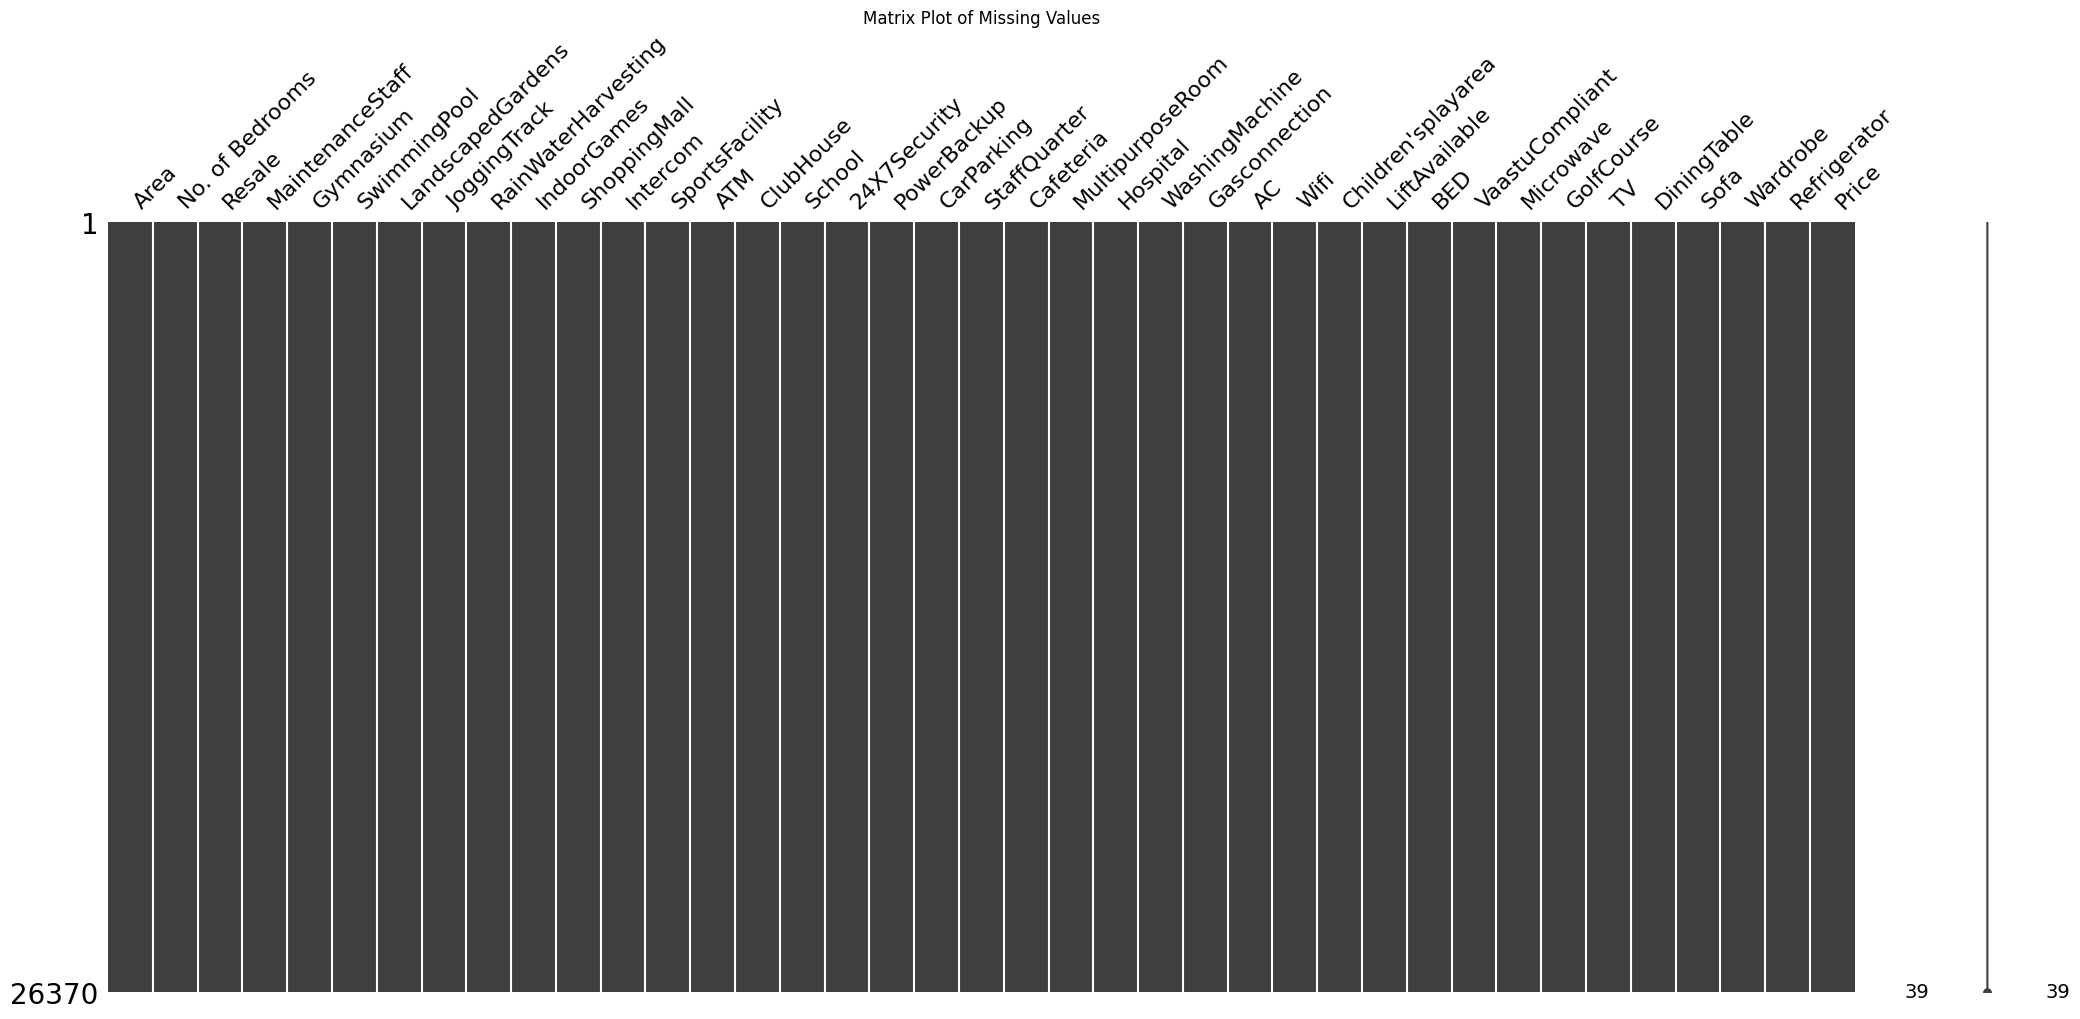

In [490]:
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title('Matrix Plot of Missing Values')
plt.show()

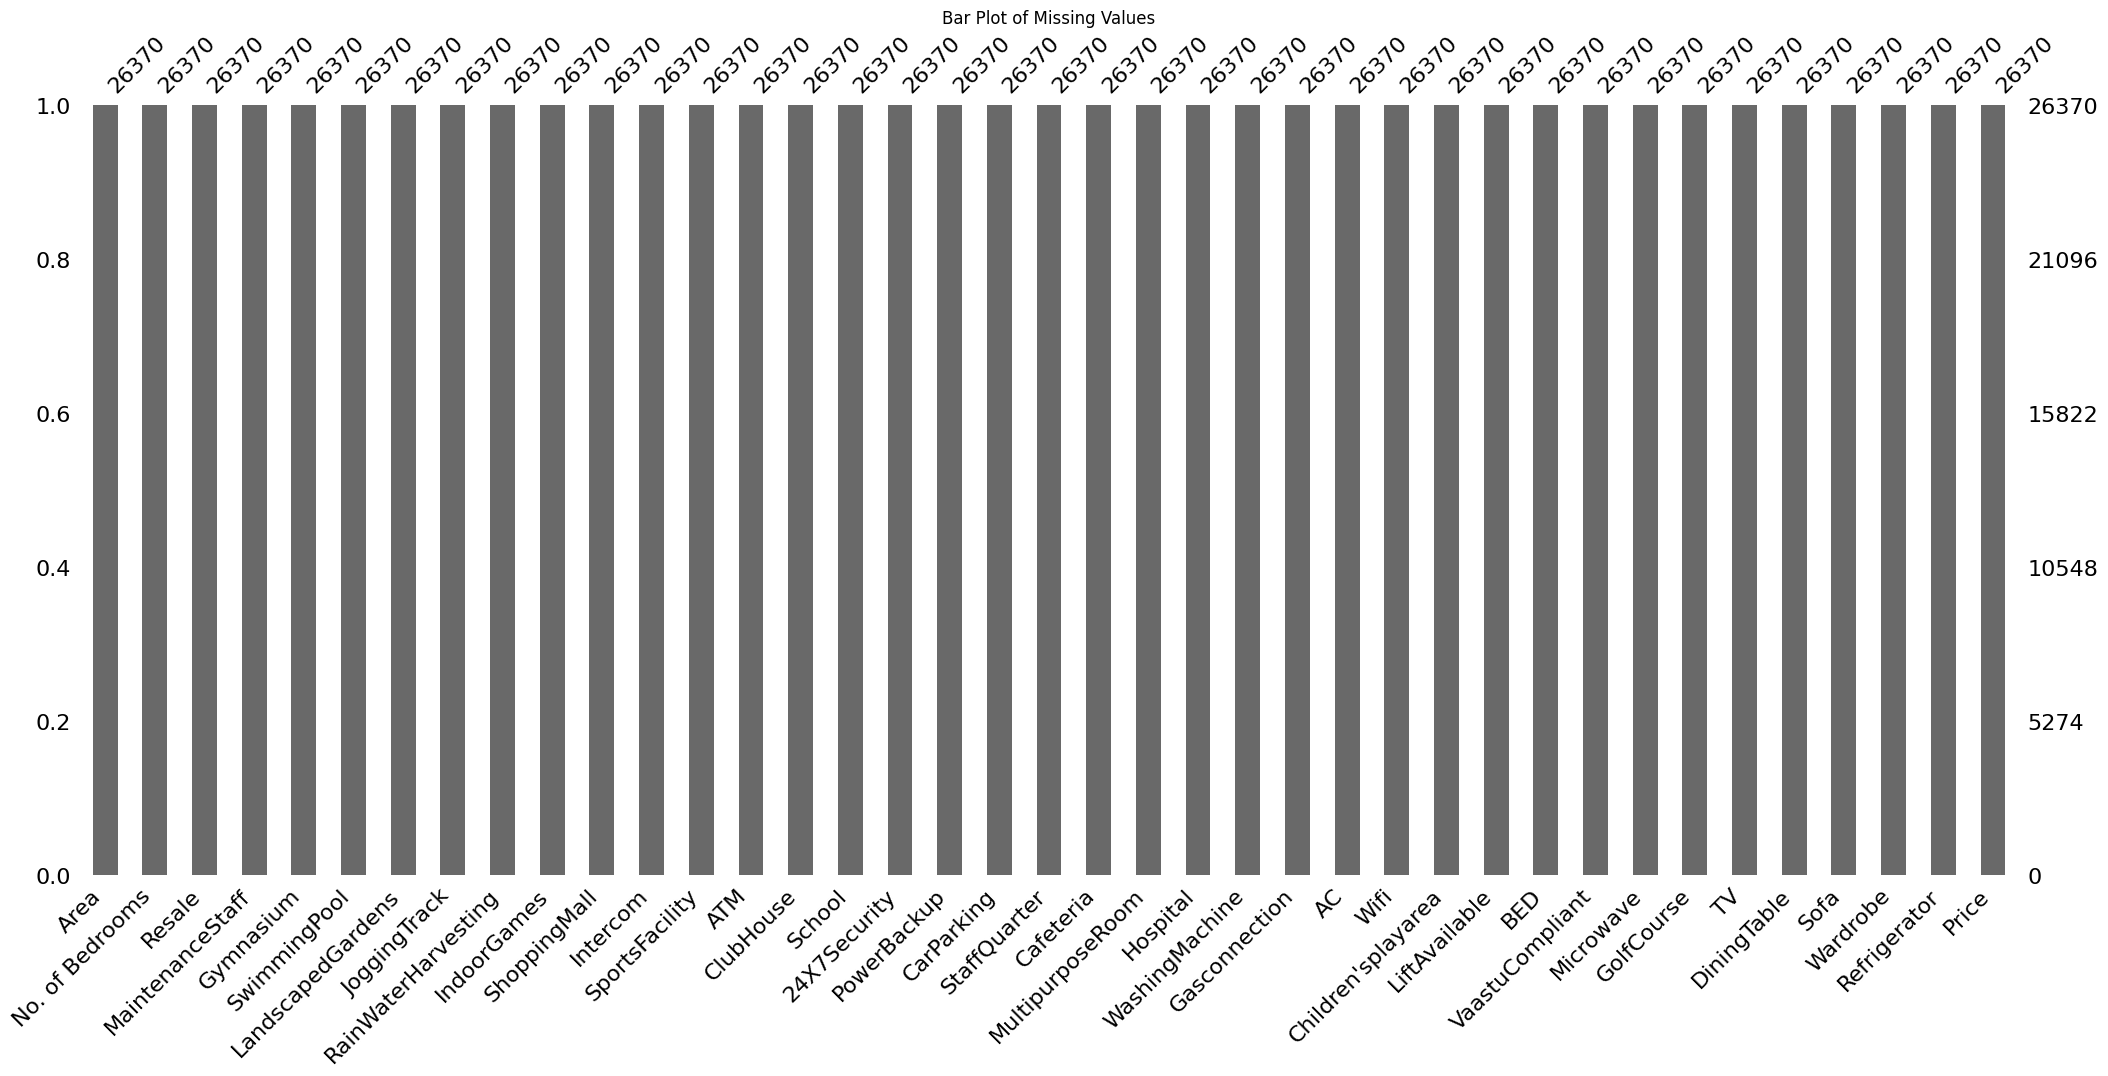

In [491]:
plt.figure(figsize=(10, 6))
msno.bar(df)
plt.title('Bar Plot of Missing Values')
plt.show()


d:\BachKhoa\AIO\AIO-Exercise-And-Note\venv\Lib\site-packages\scipy\cluster\hierarchy.py:2821: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Figure size 1000x600 with 0 Axes>

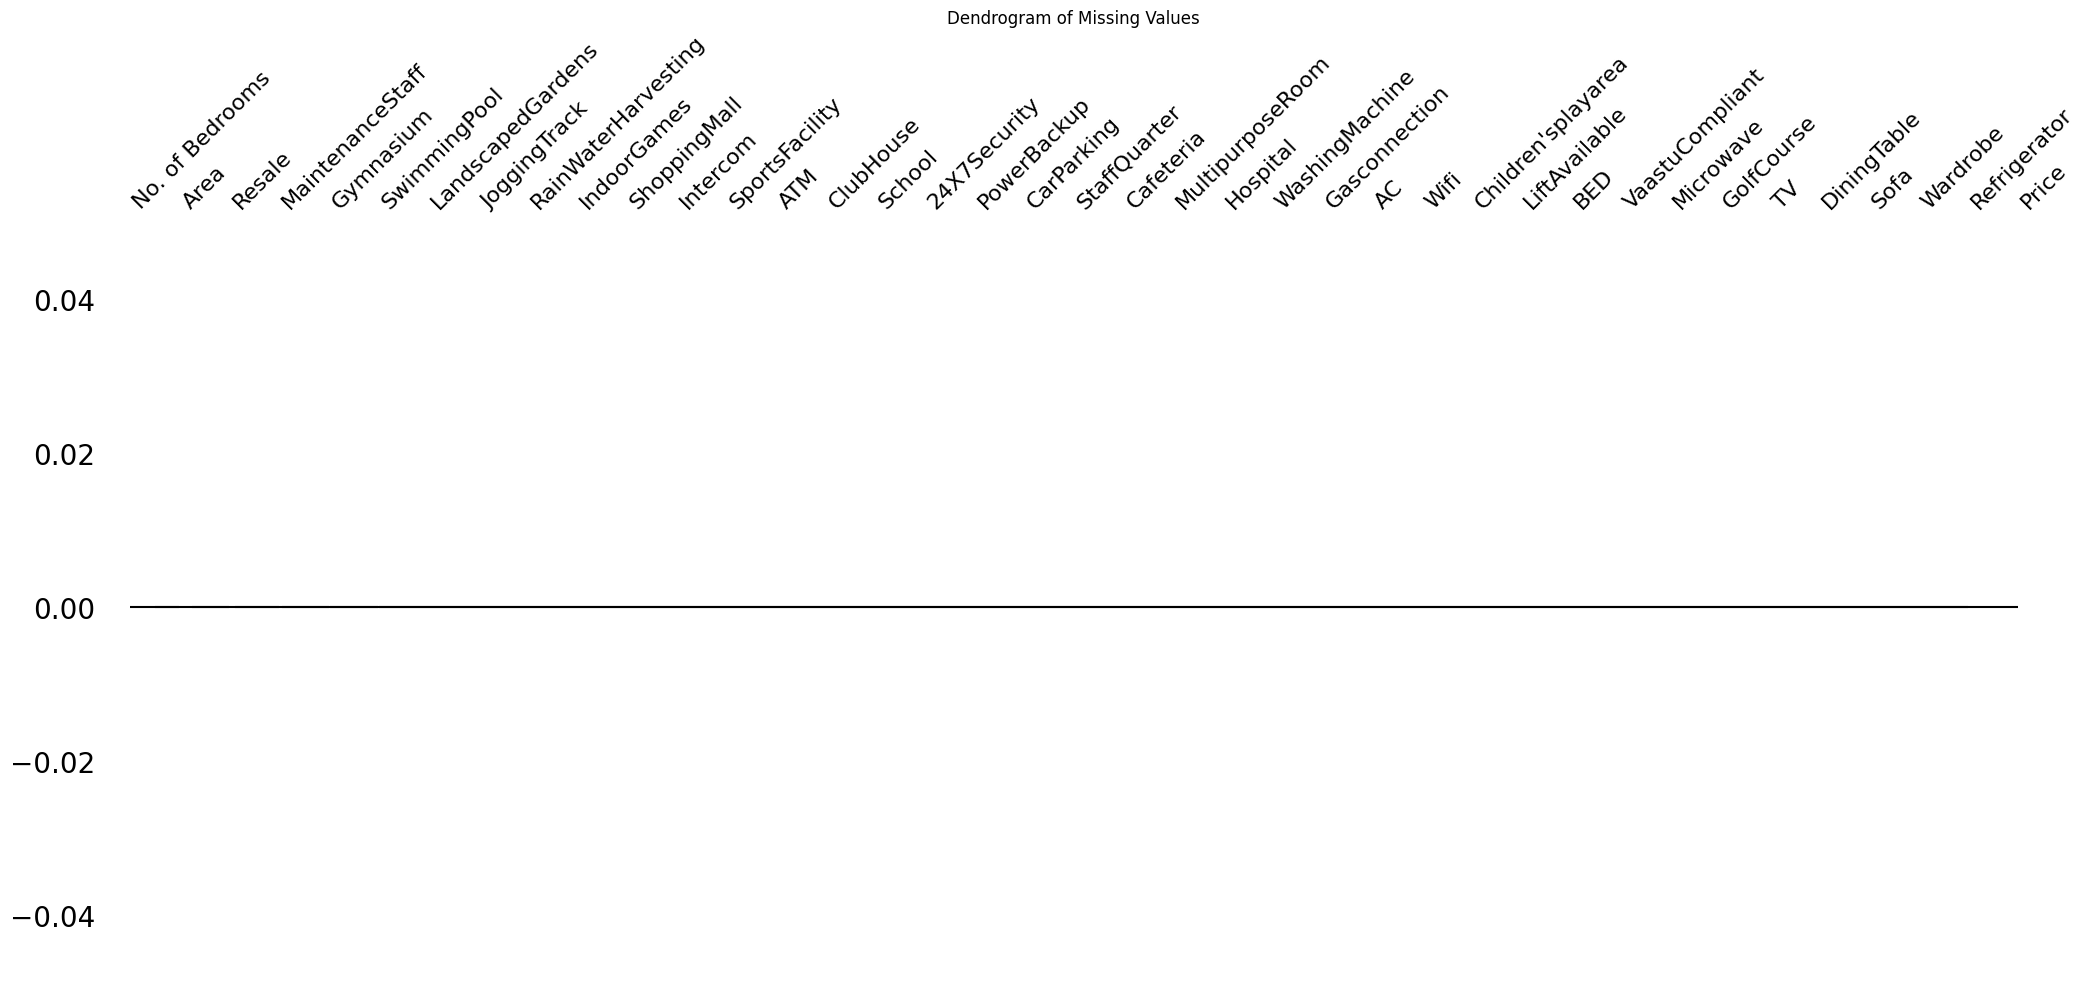

In [492]:
plt.figure(figsize=(10, 6))
msno.dendrogram(df)
plt.title('Dendrogram of Missing Values')
plt.show()

In [493]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

In [494]:
df = df.dropna()

# EDA

In [495]:
# basic descriptive
df.describe()

,Area,Price
count,26370.000000,2.637000e+04
mean,1290.292112,1.162750e+07
std,753.173789,2.297505e+07
min,200.000000,2.000000e+06
25%,851.000000,4.075250e+06
50%,1125.000000,6.791500e+06
75%,1500.000000,1.200000e+07
max,16000.000000,8.546000e+08


Text(0.5, 1.0, 'Histogram of Price')

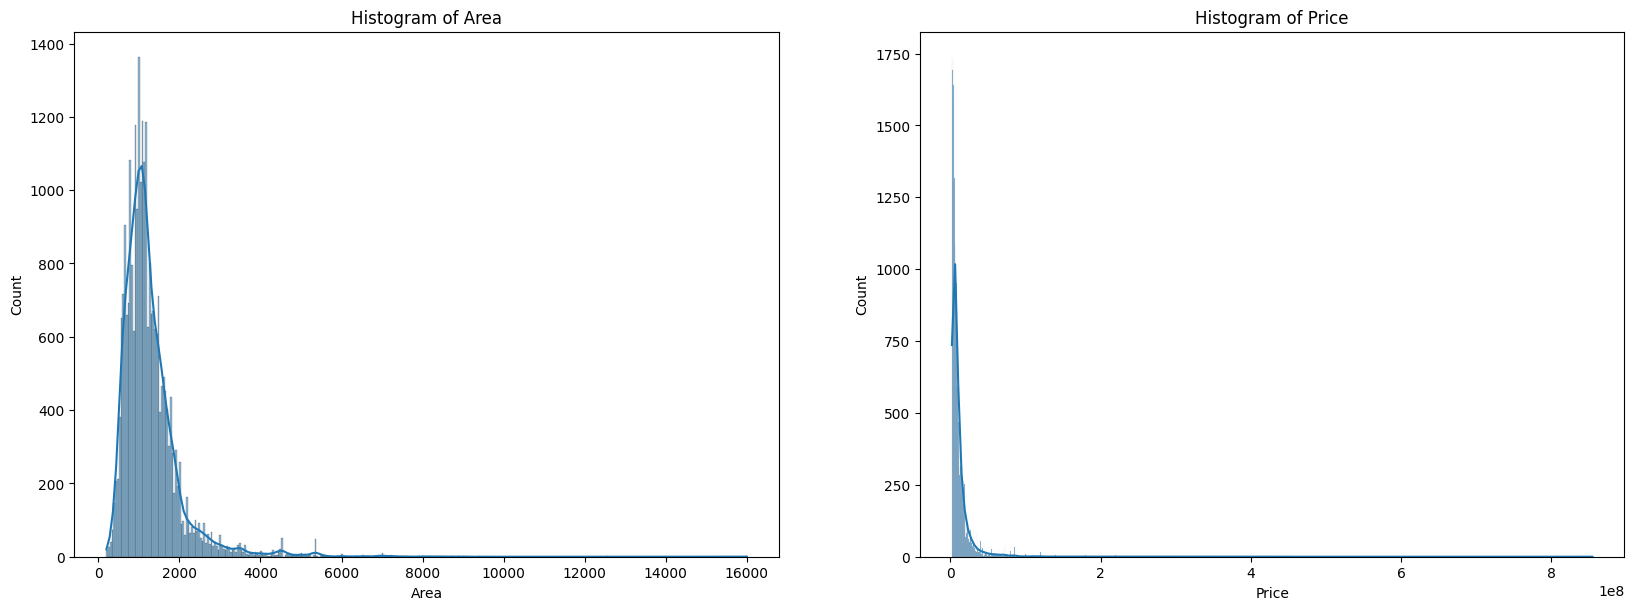

In [496]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.histplot(df['Area'].dropna(), kde=True)
plt.title('Histogram of Area')

plt.subplot(2, 2, 2)
sns.histplot(df['Price'].dropna(), kde=True)
plt.title('Histogram of Price')

Text(0.5, 1.0, 'Box Plot of Price')

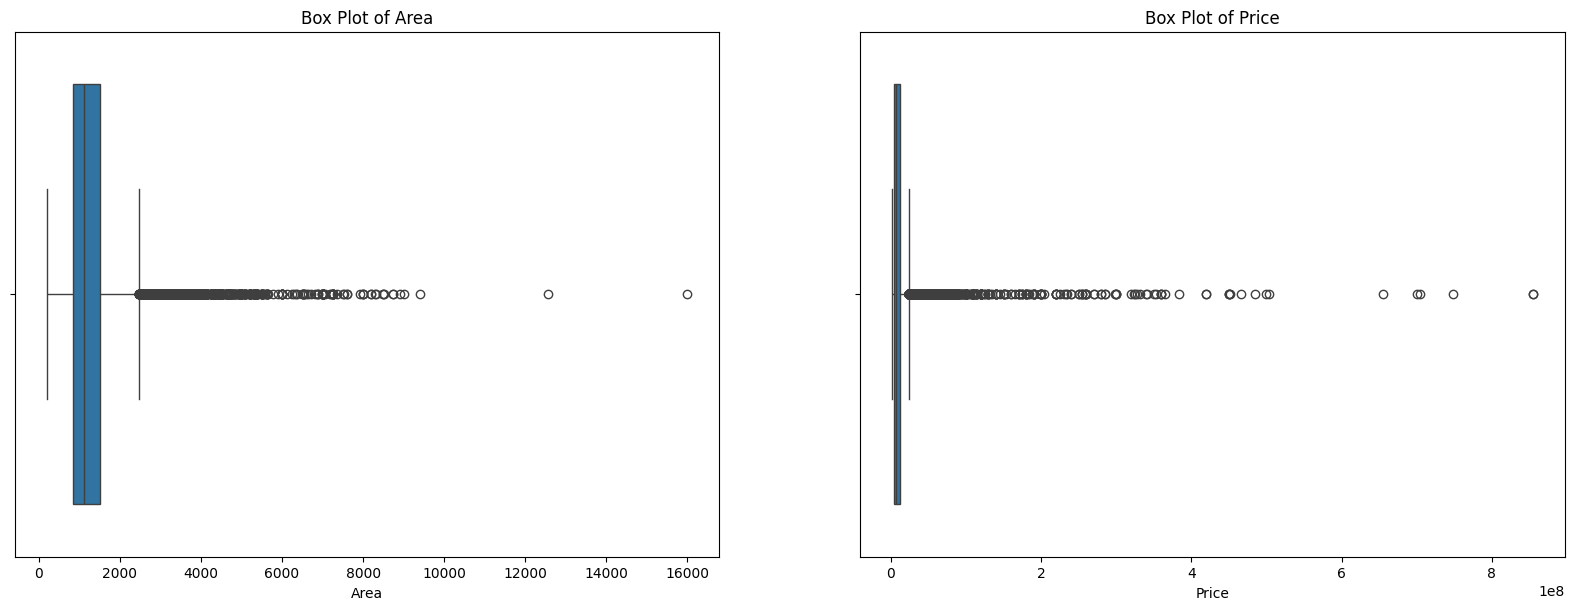

In [497]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.boxplot(x=df['Area'].dropna())
plt.title('Box Plot of Area')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['Price'].dropna())
plt.title('Box Plot of Price')

Text(0.5, 1.0, 'The scatter plot between Price and Area')

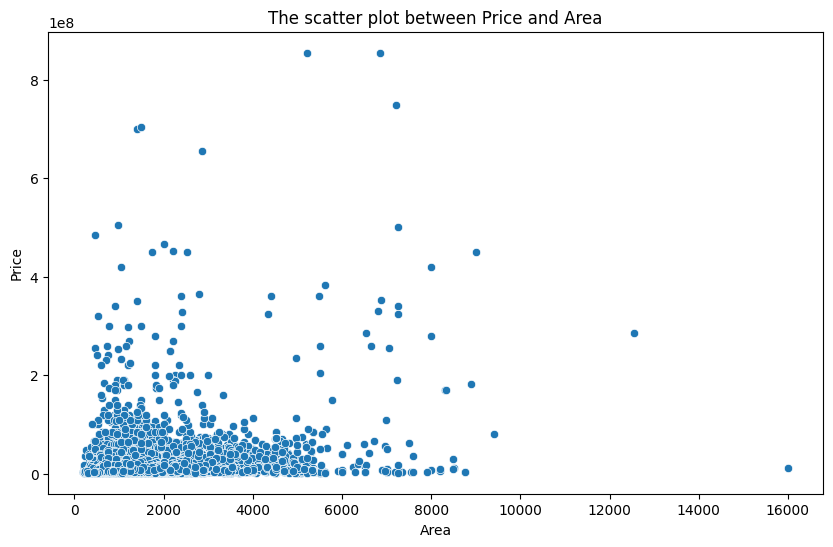

In [498]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= df, x='Area', y='Price')
plt.title("The scatter plot between Price and Area")

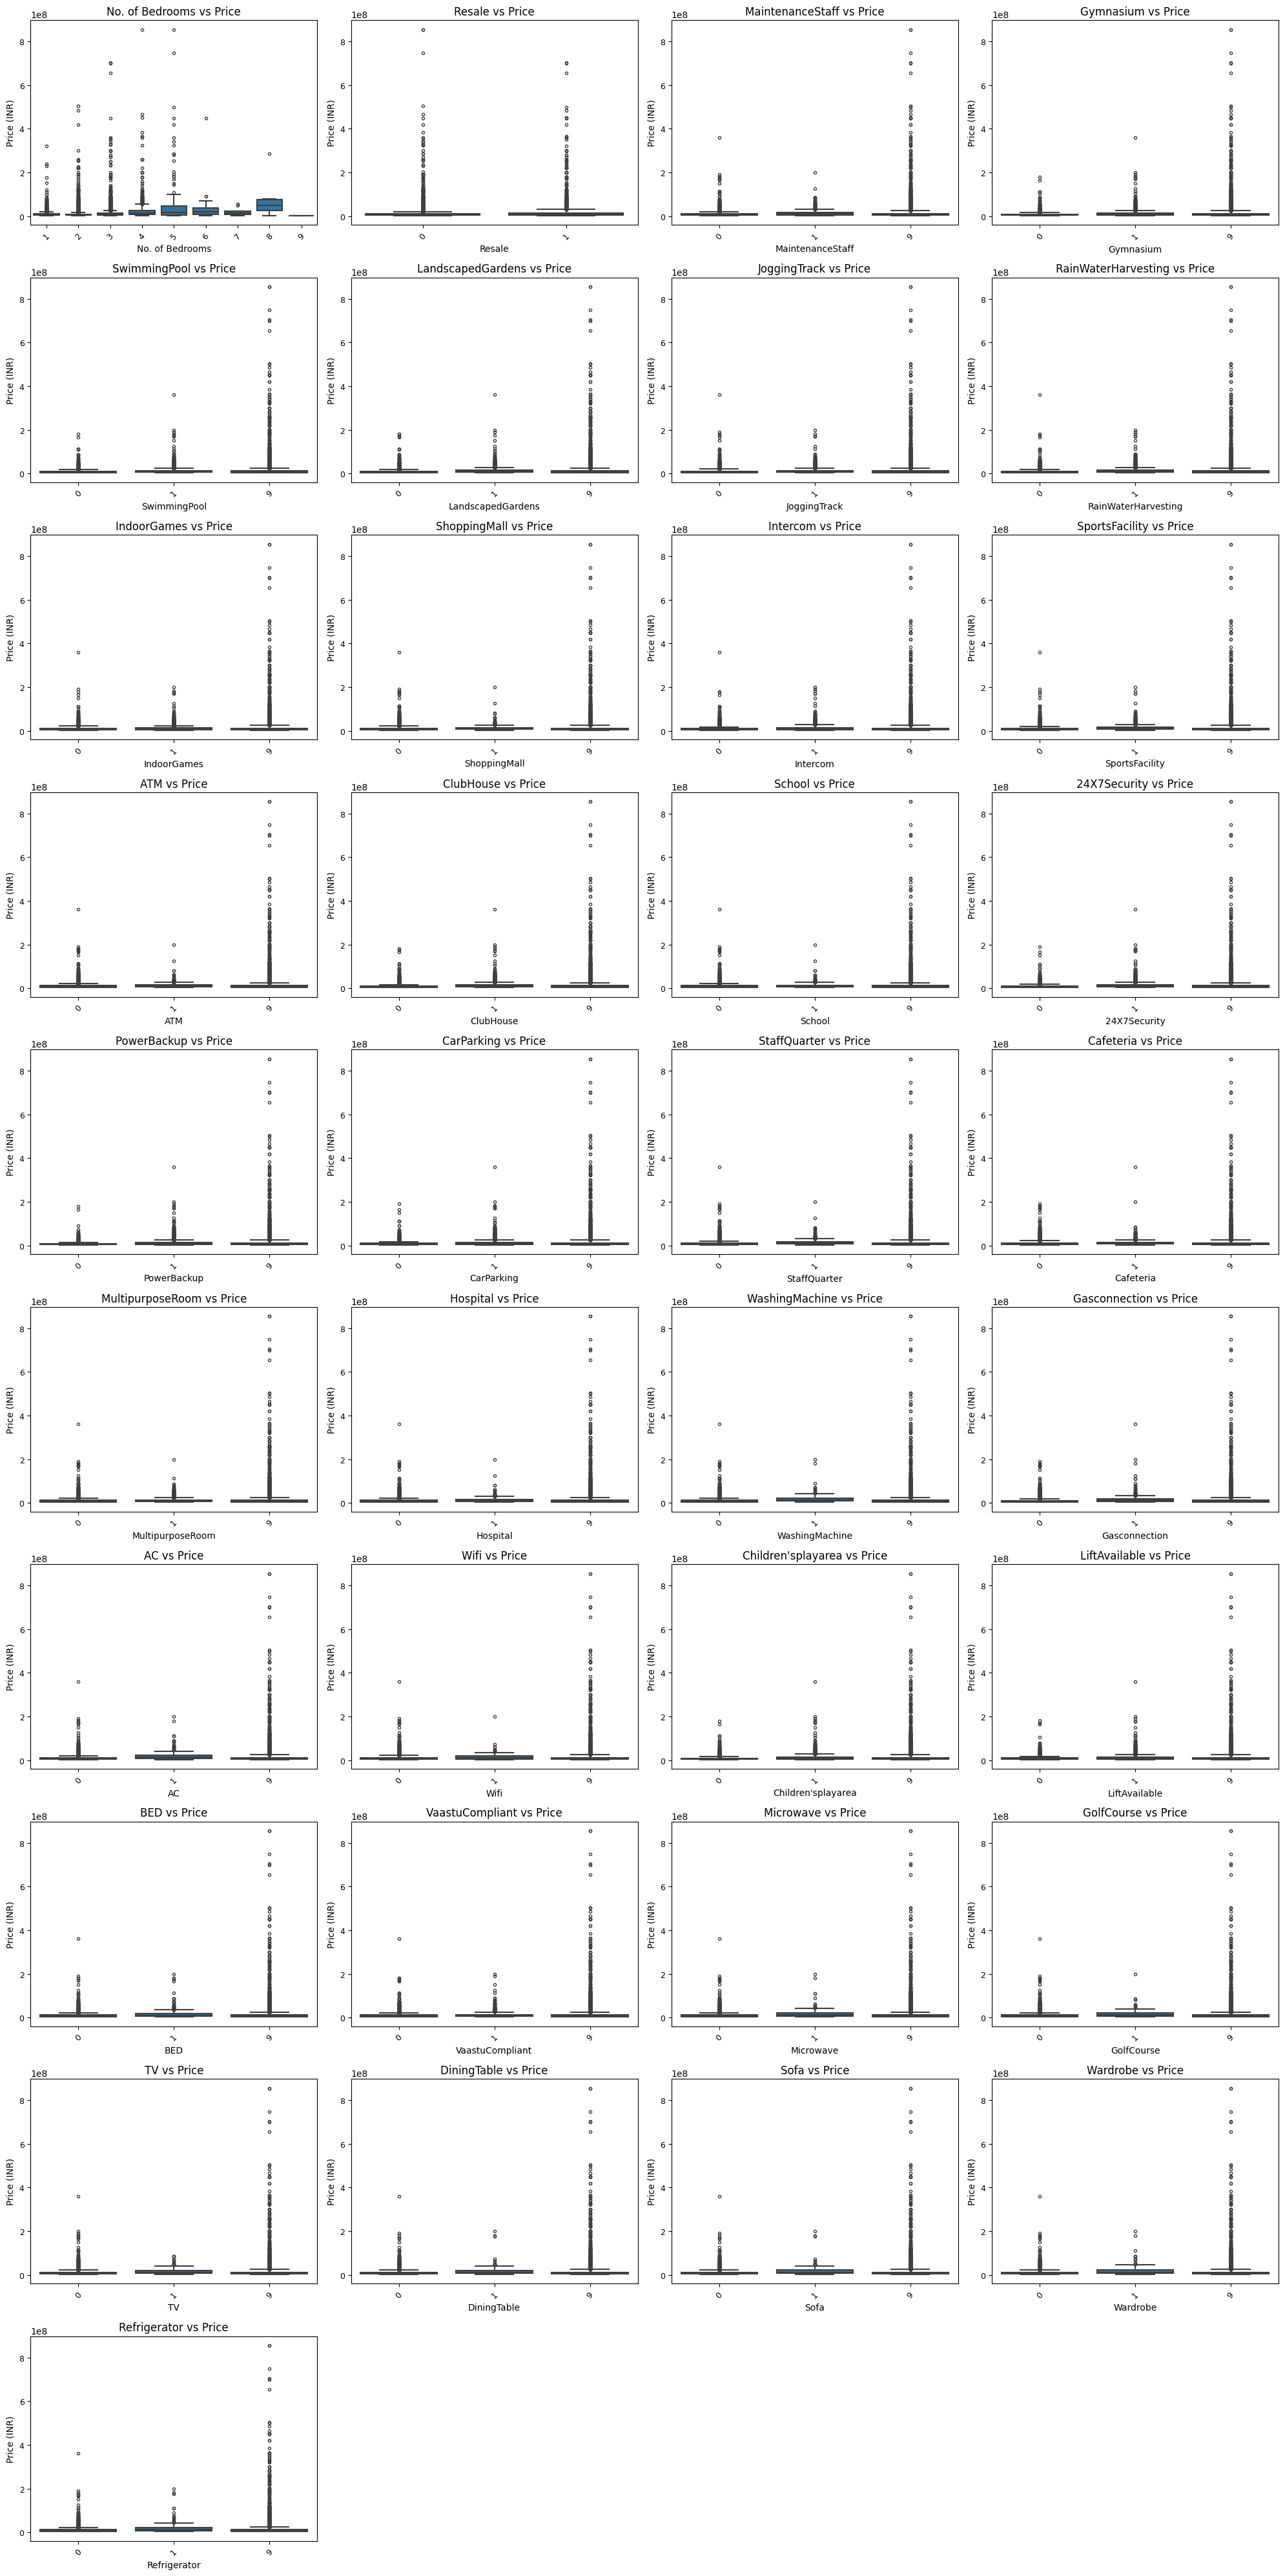

In [499]:
data_tmp = df.dropna()
fig, axes = plt.subplots(nrows=10, ncols= 4, figsize=(20, 40))
axes = axes.flatten()

for idx, feat in enumerate(discrete_variable):
    if idx < len(axes):
        sns.boxplot(x=feat, y='Price', data=data_tmp, ax=axes[idx], linewidth=1.5, fliersize=3)
        axes[idx].set_title(f'{feat} vs Price', fontsize=12)
        axes[idx].set_xlabel(feat, fontsize=10)
        axes[idx].set_ylabel('Price (INR)', fontsize=10)
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].tick_params(axis='both', which='major', labelsize=9)

# Ẩn các biểu đồ trống
for i in range(len(discrete_variable), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()


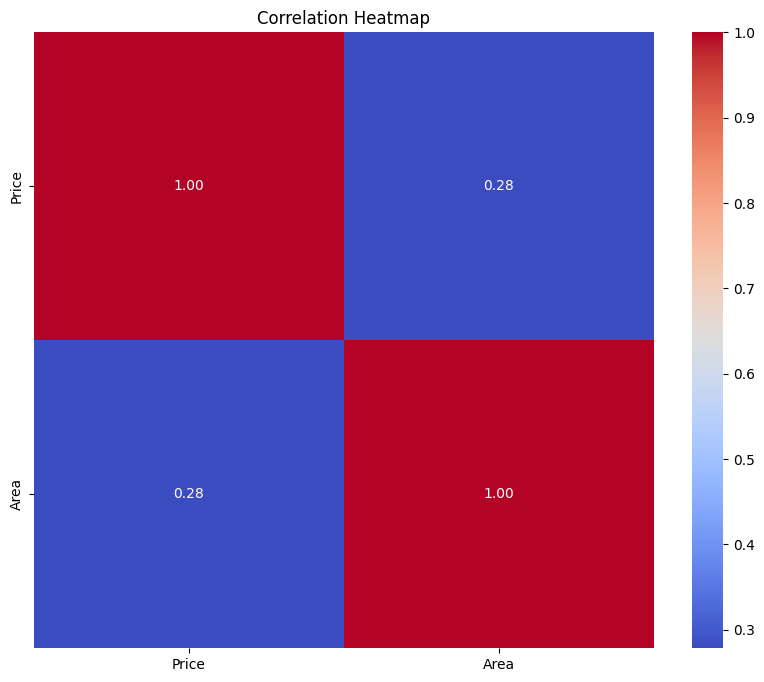

In [500]:
corr_matrix = df[['Price', 'Area']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [501]:
df.columns

Index(['Area', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff', 'Gymnasium',
       'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Children'splayarea', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator', 'Price'],
      dtype='object')

In [502]:
df['Area'] = df['Area'].apply(lambda x: np.sqrt(x))
df['Price'] = df['Price'].apply(lambda x: np.log(x) if x > 0 else 0)

In [503]:
df_test = pd.read_csv("./test.csv")
print(df_test.shape)
df_test['Area'] = df_test['Area'].apply(lambda x: np.sqrt(x))    
df_test.drop(columns=["id"], inplace=True)
df_test.drop(columns=['Location'], inplace=True)

(6593, 40)


In [504]:
df_test.shape, df.shape

((6593, 38), (26370, 39))

In [505]:
X = df.drop(columns=['Price'])
y = df['Price']

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical_X = encoder.fit_transform(X[categorical_cols])

X_combined_train = np.hstack((X[numerical_cols].values, encoded_categorical_X))
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [506]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
important_features_rf, importances_rf = X.columns[indices], importances[indices]

In [507]:
rf_feature_importance = pd.DataFrame({'Feature': important_features_rf, 'Importance': importances_rf})
print(rf_feature_importance)

                Feature  Importance
0                  Area    0.739572
1       No. of Bedrooms    0.055711
2                Resale    0.054063
3      MaintenanceStaff    0.035177
4         Gasconnection    0.008744
5         LiftAvailable    0.005428
6   RainWaterHarvesting    0.005414
7          24X7Security    0.004646
8            CarParking    0.004177
9    Children'splayarea    0.004117
10         SwimmingPool    0.003884
11             Intercom    0.003870
12         StaffQuarter    0.003868
13          PowerBackup    0.003800
14            Cafeteria    0.003641
15                  BED    0.003638
16      VaastuCompliant    0.003621
17          IndoorGames    0.003564
18    LandscapedGardens    0.003516
19            ClubHouse    0.003514
20            Gymnasium    0.003463
21     MultipurposeRoom    0.003451
22                 Wifi    0.003289
23           GolfCourse    0.003239
24       SportsFacility    0.003144
25             Wardrobe    0.003086
26               School    0

In [508]:
rf_feature_importance_2 = rf_feature_importance.sort_values(
    by='Importance',
    ascending=False
)
rf_feature_importance['CumSum'] = rf_feature_importance_2['Importance'].cumsum()

threshold= 0.99
important_features = rf_feature_importance[rf_feature_importance["CumSum"] <= threshold]["Feature"].tolist()
print(f"Number of features selected: {len(important_features)}")
print("Selected features:", important_features)

Number of features selected: 32
Selected features: ['Area', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff', 'Gasconnection', 'LiftAvailable', 'RainWaterHarvesting', '24X7Security', 'CarParking', "Children'splayarea", 'SwimmingPool', 'Intercom', 'StaffQuarter', 'PowerBackup', 'Cafeteria', 'BED', 'VaastuCompliant', 'IndoorGames', 'LandscapedGardens', 'ClubHouse', 'Gymnasium', 'MultipurposeRoom', 'Wifi', 'GolfCourse', 'SportsFacility', 'Wardrobe', 'School', 'JoggingTrack', 'ATM', 'TV', 'AC', 'Hospital']


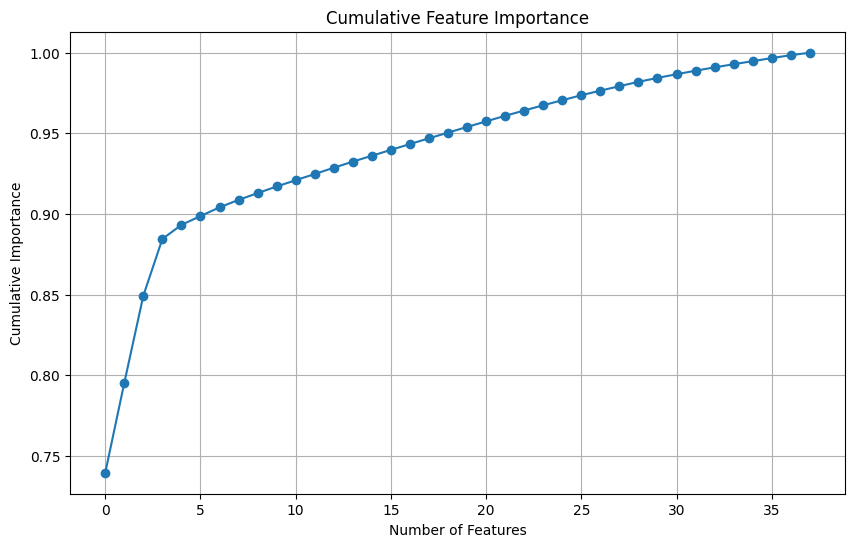

In [509]:
plt.figure(figsize=(10, 6))
plt.plot(rf_feature_importance['CumSum'], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.grid()
plt.show()

In [510]:
selected_numerical_cols = [col for col in important_features if col in numerical_cols]
selected_categorical_cols = [col for col in important_features if col in categorical_cols]

In [511]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), selected_numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), selected_categorical_cols)
    ]
)

In [521]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=100))
])

In [522]:
X = X[selected_categorical_cols + selected_numerical_cols]


In [523]:
X.shape, y.shape

((26370, 32), (26370,))

In [524]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size= 0.2, random_state=42
)

In [525]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores  # Convert negative MSE scores to positive
mean_cv_mse = np.mean(cv_mse_scores)
print(f"Cross-validated MSE scores: {cv_mse_scores}")
print(f"Root Mean cross-validated MSE: {np.sqrt(mean_cv_mse)}")

d:\BachKhoa\AIO\AIO-Exercise-And-Note\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Cross-validated MSE scores: [0.54588209 0.52835857 0.55185825 0.51550736 0.53883959]
Root Mean cross-validated MSE: 0.7321811058397572


In [526]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Area']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['No. of Bedrooms', 'Resale',
                                                   'MaintenanceStaff',
                                                   'Gasconnection',
                                                   'LiftAvailable',
                                                   'RainWaterHarvesting',
                                                   '24X7Security', 'CarParking',
                                                   "Children'splayarea",
                                                   'SwimmingPool', 'Intercom',
                                                   'StaffQuarter',
                                                   'PowerBackup', 'Cafeteria',
                                                   'BED', 'VaastuCompliant',
                                                   'IndoorGames',
                                                   'LandscapedGardens',
                                                   'ClubHouse', 'Gymnasium',
                                                   'MultipurposeRoom', 'Wifi',
                                                   'GolfCourse',
                                                   'SportsFacility', 'Wardrobe',
                                                   'School', 'JoggingTrack',
                                                   'ATM', 'TV', 'AC', ...])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, random_state=100))])

In [527]:
val_predictions = pipeline.predict(X_val)
val_mse = np.mean((val_predictions - y_val) ** 2)

In [528]:
np.sqrt(val_mse)

np.float64(0.7252753243264399)

In [529]:
df_test.columns

Index(['Area', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff', 'Gymnasium',
       'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Children'splayarea', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator'],
      dtype='object')

In [530]:
df_test['Price'] = df['Price'].astype(np.float64)
df_test['Area']  = df['Area'].astype(np.float64)
for col in selected_categorical_cols:
    df_test[col] = df_test[col].astype('object')

In [531]:
X_test = df_test[selected_categorical_cols + selected_numerical_cols]

In [532]:
test_predictions = pipeline.predict(X_test)

In [533]:
test_predictions[:5]

array([15.72779321, 15.95080928, 15.5765616 , 17.24944688, 16.28180409])

In [534]:
test_predictions_inverse = np.exp(test_predictions)

In [535]:
test_predictions

array([15.72779321, 15.95080928, 15.5765616 , ..., 16.32328145,
       15.22107997, 15.74549173])

In [536]:
submit_df = pd.read_csv('test.csv')
list_id = submit_df['id']
list_id = np.array(list_id.to_list())
len(list_id), len(test_predictions)

(6593, 6593)

In [537]:
df = pd.DataFrame({
    'id': list_id,
    'Price': test_predictions_inverse
})

In [538]:
df.to_csv('submission2.csv', index=False)